# Replication 5: Python
Group  : 1

Members:
- Juan José Tang
- Ursula Cotrina 
- Victoria Olivera


## I. Bootstraping

### Loading data

In [172]:
import pandas as pd
import numpy as np
import pyreadr

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
## loading the data
Penn = pd.read_csv("../../data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]
Penn = Penn[ (Penn['tg'] == 4) | (Penn['tg'] == 0) ]

In [194]:
Penn.shape

(5099, 24)

In [195]:
# Dependent variable
Penn['T4'] = (Penn[['tg']]==4).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T4
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
11,10607,4,9,9,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,NaN,1
12,10831,0,27,27,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,NaN,0


In [196]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

In [197]:
Penn["log(inuidur1)"] = np.log( Penn["inuidur1"] ) 

In [198]:
# Creating dummies varibles for dep
Penn1 = pd.get_dummies(Penn["dep"],prefix='dep')
Penn1=pd.DataFrame(Penn1)
Penn=pd.concat([Penn, Penn1], axis=1)
Penn



,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,durable,nondurable,lusd,husd,muld,T4,log(inuidur1),dep_0,dep_1,dep_2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,1,0,NaN,0,2.890372,0,0,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,1,0,0,NaN,0,0.000000,1,0,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,1,0,0,NaN,0,3.295837,1,0,0
11,10607,4,9,9,0,0,0,0,0,0,...,0,0,0,1,NaN,1,2.197225,1,0,0
12,10831,0,27,27,0,0,0,0,1,0,...,0,1,0,0,NaN,0,3.295837,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13904,10628,4,10,10,0,0,1,0,0,0,...,0,0,0,1,NaN,1,2.302585,1,0,0
13905,10523,4,4,4,0,0,1,0,2,0,...,0,0,0,1,NaN,1,1.386294,0,0,1
13906,10558,0,9,9,0,0,0,0,2,0,...,0,1,0,0,NaN,0,2.197225,0,0,1
13910,10817,4,4,4,0,0,0,0,0,0,...,0,0,0,0,NaN,1,1.386294,1,0,0


In [199]:
Penn.columns

Index(['abdt', 'tg', 'inuidur1', 'inuidur2', 'female', 'black', 'hispanic',
       'othrace', 'dep', 'q1', 'q2', 'q3', 'q4', 'Unnamed: 13', 'q5', 'q6',
       'recall', 'agelt35', 'agegt54', 'durable', 'nondurable', 'lusd', 'husd',
       'muld', 'T4', 'log(inuidur1)', 'dep_0', 'dep_1', 'dep_2'],
      dtype='object')

In [211]:
Penn.index

Int64Index([    0,     3,     4,    11,    12,    13,    14,    16,    22,
               24,
            ...
            13894, 13895, 13898, 13899, 13900, 13904, 13905, 13906, 13910,
            13911],
           dtype='int64', length=5099)

In [212]:
#Reset the index
Penn=Penn.reset_index()
Penn.index

RangeIndex(start=0, stop=5099, step=1)

### Functions

In [219]:
# equivalent to sample function in lab
def get_indices(data,num_samples):
    return  np.random.choice(data.index, num_samples, replace=True)

In [220]:
#similar to boot.fn in R
def get_estimates(data,index):
    X = data[['T4','female','black','othrace','dep_1','dep_2','q2','q3','q4','q5','q6','agelt35','agegt54','durable','lusd','husd']].loc[index]
    y = data['log(inuidur1)'].loc[index]
    
    lr = LinearRegression()
    lr.fit(X,y)
    intercept = lr.intercept_
    coef = lr.coef_
    return [intercept,coef]



In [221]:
get_estimates(Penn,np.arange(0,5099))

[1.7723227707334424,
 array([-0.07620609,  0.13812843, -0.30790531, -0.43972813,  0.05291891,
         0.12322238,  0.14990241,  0.05948183,  0.04518311,  0.13335249,
         0.36856411,  0.32957817,  0.1229282 , -0.20836448,  0.05875018,
         0.2070354 ])]

In [226]:
# there is no built function like boot, so, we will define one
def boot(data,func,R):
    intercept = []
    coeff_1 = []
    coeff_2 = []
    coeff_3 = []
    
    for i in range(R):
        intercept.append(func(data,get_indices(data,n))[0])
        coeff_1.append(func(data,get_indices(data,n))[1][0]) 
        coeff_2.append(func(data,get_indices(data,n))[1][1])
        coeff_3.append(func(data,get_indices(data,n))[1][2])
    intercept_statistics = {'estimated_value':np.mean(intercept),'std_error':np.std(intercept)}   
    coeff_1_statistices = {'estimated_value':np.mean(coeff_1),'std_error':np.std(coeff_1)}   
    coeff_2_statistices = {'estimated_value':np.mean(coeff_2),'std_error':np.std(coeff_2)}   
    coeff_3_statistices = {'estimated_value':np.mean(coeff_3),'std_error':np.std(coeff_3)}  
    return {'intercept':intercept_statistics,'coeff_1_statistices':coeff_1_statistices,'coeff_2_statistices':coeff_2_statistices, 'coeff_3_statistices':coeff_3_statistices}, coeff_1, coeff_2, coeff_3

In [227]:
results = boot(Penn,get_estimates,1000)

In [230]:
results = boot(Penn,get_estimates,1000)
print('Result for intercept ',results[0]['intercept'])
print('Result for coefficient term T4',results[0]['coeff_1_statistices'])
print('Result for coefficient term female',results[0]['coeff_2_statistices'])
print('Result for coefficient term black',results[0]['coeff_3_statistices'])

Result for intercept  {'estimated_value': 1.7735543152511741, 'std_error': 0.029984793850714217}
Result for coefficient term T4 {'estimated_value': -0.07453785252754948, 'std_error': 0.019690794211882297}
Result for coefficient term female {'estimated_value': 0.1372689289601439, 'std_error': 0.021339143851238626}
Result for coefficient term black {'estimated_value': -0.3074979036491862, 'std_error': 0.03569278849694873}


In [274]:
# lets see what the model predicts
import statsmodels.api as sm
X = Penn[['T4','female','black','othrace','dep_1','dep_2','q2','q3','q4','q5','q6','agelt35','agegt54','durable','lusd','husd']]
y = Penn['log(inuidur1)']
X = sm.add_constant(X)
ols = sm.OLS(y,X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:          log(inuidur1)   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     12.51
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           3.92e-33
Time:                        08:59:59   Log-Likelihood:                -8128.2
No. Observations:                5099   AIC:                         1.629e+04
Df Residuals:                    5082   BIC:                         1.640e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7723      0.049     36.011      0.0

C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram - T4's coefficient (Density)")

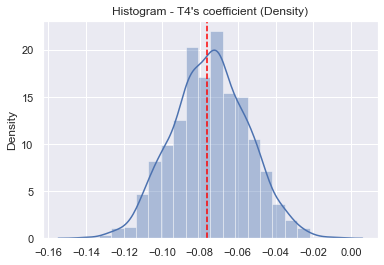

In [233]:
sns.set_theme()
ax = sns.distplot(results[1], bins=20)

plt.axvline(x= -0.0762 , color='red', ls='--')
plt.title("Histogram - T4's coefficient (Density)")

C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram - female's coefficient (Density)")

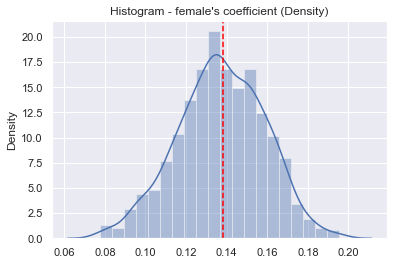

In [234]:
sns.set_theme()
ax = sns.distplot(results[2], bins=20)

plt.axvline(x=  0.1381  , color='red', ls='--')
plt.title("Histogram - female's coefficient (Density)")

C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram - black's coefficient (Density)")

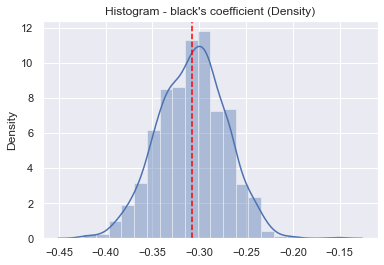

In [235]:
sns.set_theme()
ax = sns.distplot(results[3], bins=20)

plt.axvline(x=  -0.3079   , color='red', ls='--')
plt.title("Histogram - black's coefficient (Density)")

### Summary results

In [288]:

coeff=(ols.params[1],ols.params[2]
coeff
coeff[1]
#est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
#std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

-0.076206085960052

In [295]:
table_1 = np.zeros( (3, 4) )

table_1[0,0] = ols.summary2().tables[1]['Coef.']['T4']
table_1[0,1] = -0.0745
table_1[0,2] = ols.summary2().tables[1]['Std.Err.']['T4']
table_1[0,3] = 0.0197

table_1[1,0] = ols.summary2().tables[1]['Coef.']['female']
table_1[1,1] = 0.1373
table_1[1,2] = ols.summary2().tables[1]['Std.Err.']['female']
table_1[1,3] = 0.0213

table_1[2,0] = ols.summary2().tables[1]['Coef.']['black']
table_1[2,1] = -0.3075
table_1[2,2] = ols.summary2().tables[1]['Std.Err.']['black']
table_1[2,3] = 0.0357

table1 = pd.DataFrame(table_1, columns = ["coef", "coef boot", "std err", "std err boot"], \
                      index = ["T4","female","black"])

table1

,coef,coef boot,std err,std err boot
T4,-0.076206,-0.0745,0.035288,0.0197
female,0.138128,0.1373,0.034614,0.0213
black,-0.307905,-0.3075,0.053482,0.0357


## II. Comparative Models

### Data

In [7]:
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random

In [8]:
rdata_read = pyreadr.read_r("../../data/cps2012.Rdata")

# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]

data.shape

(29217, 23)

In [9]:
data=data.drop(['year'],axis=1)
data

,lnw,female,widowed,divorced,separated,nevermarried,hsd08,hsd911,hsg,cg,...,so,we,exp1,exp2,exp3,exp4,weight,married,ne,sc
0,1.909543,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,4.84,10.648,23.4256,569.43,True,True,True
1,1.365773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,30.0,9.00,27.000,81.0000,625.96,True,True,False
2,2.540223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,19.0,3.61,6.859,13.0321,264.22,True,True,False
3,1.801091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,14.0,1.96,2.744,3.8416,256.81,True,True,False
4,3.349904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,15.0,2.25,3.375,5.0625,256.81,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29212,3.978513,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,27.0,7.29,19.683,53.1441,301.43,False,False,False
29213,3.142265,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,16.0,2.56,4.096,6.5536,206.36,False,False,False
29214,2.725619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,21.0,4.41,9.261,19.4481,272.35,True,False,True
29215,3.142265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.04,0.008,0.0016,282.87,True,False,False


In [10]:
data.columns

Index(['lnw', 'female', 'widowed', 'divorced', 'separated', 'nevermarried',
       'hsd08', 'hsd911', 'hsg', 'cg', 'ad', 'mw', 'so', 'we', 'exp1', 'exp2',
       'exp3', 'exp4', 'weight', 'married', 'ne', 'sc'],
      dtype='object')

In [11]:
Z = data.loc[:, 'female':'exp3']
Z.columns

Index(['female', 'widowed', 'divorced', 'separated', 'nevermarried', 'hsd08',
       'hsd911', 'hsg', 'cg', 'ad', 'mw', 'so', 'we', 'exp1', 'exp2', 'exp3'],
      dtype='object')

### Analysis

In [12]:
nrow = data.shape[0]
length = int(nrow*(3/4))

In [13]:
from numpy.random import default_rng


random.seed(30)
rng = default_rng()

training = rng.choice(nrow, size = length, replace=False)
training_bool = data.index.isin( training )

training_bool

array([False,  True,  True, ...,  True,  True,  True])

In [14]:
from numpy.random import default_rng


random.seed(30)
rng = default_rng()

training = rng.choice(nrow, size = length, replace=False)

training_bool = data.index.isin( training )

data_train = data.iloc[training,:]

data_train = data[training_bool]
data_test = data[~training_bool]

In [15]:
data_train

,lnw,female,widowed,divorced,separated,nevermarried,hsd08,hsd911,hsg,cg,...,so,we,exp1,exp2,exp3,exp4,weight,married,ne,sc
0,1.909543,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,4.84,10.648,23.4256,569.43,True,True,True
1,1.365773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,30.0,9.00,27.000,81.0000,625.96,True,True,False
2,2.540223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,19.0,3.61,6.859,13.0321,264.22,True,True,False
3,1.801091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,14.0,1.96,2.744,3.8416,256.81,True,True,False
4,3.349904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,15.0,2.25,3.375,5.0625,256.81,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29211,2.705547,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,16.0,2.56,4.096,6.5536,270.30,True,False,False
29212,3.978513,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,27.0,7.29,19.683,53.1441,301.43,False,False,False
29213,3.142265,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,16.0,2.56,4.096,6.5536,206.36,False,False,False
29214,2.725619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,21.0,4.41,9.261,19.4481,272.35,True,False,True


In [16]:
data_train.shape

(21912, 22)

In [17]:
data_test.shape

(7305, 22)

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


In [20]:
formula_basic =  "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"
formula_flex = "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3) ^ 2"

y_basic_train, model_X_basic_train = patsy.dmatrices(formula_basic, data_train, return_type='dataframe')

In [21]:
model_X_basic_train

,Intercept,female,female:widowed,female:divorced,female:separated,female:nevermarried,female:hsd08,female:hsd911,female:hsg,female:cg,female:ad,female:mw,female:so,female:we,female:exp1,female:exp2,female:exp3
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,4.84,10.648
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,9.00,27.000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0,1.96,2.744
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29211,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16.0,2.56,4.096
29212,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
29213,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16.0,2.56,4.096
29214,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,4.41,9.261


In [24]:
formula_basic =  "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"
formula_flex = "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3) **2"

y_basic_train, model_X_basic_train = patsy.dmatrices(formula_basic, data_train, return_type='dataframe')
y_basic_test, model_X_basic_test = patsy.dmatrices(formula_basic, data_test, return_type='dataframe')
p_basic = model_X_basic_train.shape[ 1 ]

y_flex_train, model_X_flex_train = patsy.dmatrices(formula_flex, data_train, return_type='dataframe')
y_flex_test, model_X_flex_test = patsy.dmatrices(formula_flex, data_test, return_type='dataframe')
p_flex = model_X_flex_train.shape[ 1 ]

In [25]:
print(p_basic)
print(p_flex)

17
137


In [26]:
Y_train = data_train['lnw']
Y_test = data_test['lnw']

### OLS

In [27]:
# ols (basic model)
lm_basic = sm.OLS( Y_train, model_X_basic_train )
fit_lm_basic = lm_basic.fit()

# Compute the Out-Of-Sample Performance
yhat_lm_basic = fit_lm_basic.predict( model_X_basic_test )

print( f"The mean squared error (MSE) using the basic model is equal to , {np.mean((Y_test-yhat_lm_basic)**2)} ") # MSE OLS (basic model)    

The mean squared error (MSE) using the basic model is equal to , 0.3762166043070957 


In [28]:
resid_basic = (Y_test-yhat_lm_basic)**2

MSE_lm_basic = sm.OLS( resid_basic , np.ones( resid_basic.shape[0] ) ).fit().summary2().tables[1].iloc[0, 0:2]
MSE_lm_basic

Coef.       0.376217
Std.Err.    0.012394
Name: const, dtype: float64

In [29]:
R2_lm_basic = 1 - ( MSE_lm_basic[0]/Y_test.var() )
print( f"The R^2 using the basic model is equal to, {R2_lm_basic}" ) # MSE OLS (basic model) 

The R^2 using the basic model is equal to, 0.13105605921272057


In [30]:
# ols (flex model)
lm_flex = sm.OLS( Y_train, model_X_flex_train )
fit_lm_flex = lm_flex.fit()

yhat_lm_flex = fit_lm_flex.predict( model_X_flex_test )

resid_flex = (Y_test-yhat_lm_flex)**2

MSE_lm_flex = sm.OLS( resid_flex , np.ones( resid_flex.shape[0] ) ).fit().summary2().tables[1].iloc[0, 0:2]
MSE_lm_flex

R2_lm_flex = 1 - ( MSE_lm_flex[0]/Y_test.var() )

print( f"The mean squared error (MSE) using theflexible model is equal to , {np.mean((Y_test-yhat_lm_flex)**2)} ") 
print( f"The R^2 using the flex model is equal to, {R2_lm_flex}" ) # MSE OLS (flex model) 

The mean squared error (MSE) using theflexible model is equal to , 0.3195382109445459 
The R^2 using the flex model is equal to, 0.2619656095146091


### Lasso, Ridge and Elasticnet

In [31]:
import hdmpy

In [32]:
fit_rlasso = hdmpy.rlasso( model_X_basic_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = False )

C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in tru

In [33]:
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

In [34]:
np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T

array([[1.00000000e+00, 4.28336756e-01, 5.88637919e-03, ...,
        7.87180014e+00, 1.79143566e+00, 4.53148848e+00],
       [1.00000000e+00, 4.28336756e-01, 5.88637919e-03, ...,
        7.87180014e+00, 1.79143566e+00, 4.53148848e+00],
       [1.00000000e+00, 4.28336756e-01, 5.88637919e-03, ...,
        7.87180014e+00, 1.79143566e+00, 4.53148848e+00],
       ...,
       [1.00000000e+00, 4.28336756e-01, 5.88637919e-03, ...,
        7.87180014e+00, 1.79143566e+00, 4.53148848e+00],
       [1.00000000e+00, 4.28336756e-01, 5.88637919e-03, ...,
        7.87180014e+00, 1.79143566e+00, 4.53148848e+00],
       [1.00000000e+00, 4.28336756e-01, 5.88637919e-03, ...,
        7.87180014e+00, 1.79143566e+00, 4.53148848e+00]])

In [35]:
fit_rlasso.est['index'].iloc[:, 0].to_list()

[False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False]

In [36]:
fit_rlasso.est['beta'].loc[ fit_rlasso.est['index'].iloc[:, 0].to_list(), ]

,0
V2,-0.351739
V5,-0.030784
V6,-0.061394
V7,-0.471209
V8,-0.431213
V9,-0.183957
V10,0.271704
V11,0.488805
V12,-0.069421
V13,-0.027707


In [37]:
# Getting mean of each variable
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_basic_test.to_numpy() - \
                    (np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T)


# Getting the significant variables
x1_est_rlasso = new_x1[ :, fit_rlasso.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso = fit_rlasso.est['beta'].loc[ fit_rlasso.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()



# yhat
yhat_rlasso = (x1_est_rlasso @ beta_rlasso) + np.mean( Y_test.to_numpy() )
residuals_rlasso = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso

In [39]:
MSE_lasso = sm.OLS( ( residuals_rlasso )**2 , np.ones( yhat_rlasso.size )  ).fit().summary2().tables[1].round(3)
#MSE_lasso_post = sm.OLS( ( residuals_rlasso_post )**2  , np.ones( yhat_rlasso_post.size )  ).fit().summary2().tables[1].round(3)

R2_lasso = 1 - MSE_lasso.iloc[0, 0]/ np.var( Y_test )
#R2_lasso_post = 1 - MSE_lasso_post.iloc[0, 0]/ np.var( Y_test )

print( f"The R^2 using the basic model is equal to {R2_lasso} for lasso") # R^2 lasso(basic model)

The R^2 using the basic model is equal to 0.12219742125890432 for lasso


In [40]:
fit_rlasso_flex = hdmpy.rlasso( model_X_flex_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = False )
#fit_rlasso_post_flex = hdmpy.rlasso( model_X_flex_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = True )

C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in tru

In [41]:
# Getting mean of each variable
meanx = model_X_flex_test.mean( axis = 0 ).values.\
                        reshape( model_X_flex_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_flex_test.to_numpy() - \
                    (np.ones( ( model_X_flex_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_flex = new_x1[ :, fit_rlasso_flex.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_flex = fit_rlasso_flex.est['beta'].loc[ fit_rlasso_flex.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_flex = (x1_est_rlasso_flex @ beta_rlasso_flex) + np.mean( Y_test.to_numpy() )
residuals_rlasso_flex = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_flex

In [45]:
MSE_lasso_flex = sm.OLS( ( residuals_rlasso_flex )**2 , np.ones( yhat_rlasso_flex.size )  ).fit().summary2().tables[1].round(3)
#MSE_lasso_post_flex = sm.OLS( ( residuals_rlasso_post_flex )**2  , np.ones( yhat_rlasso_post_flex.size )  ).fit().summary2().tables[1].round(3)

R2_lasso_flex = 1 - MSE_lasso_flex.iloc[0, 0]/ np.var( Y_test )
#R2_lasso_post_flex = 1 - MSE_lasso_post_flex.iloc[0, 0]/ np.var( Y_test )

print( f"The R^2 using the basic model is equal to {R2_lasso_flex} for lasso") # R^2 lasso (basic model) 

The R^2 using the basic model is equal to 0.25848782164239026 for lasso


In contrast to a theoretical based choice of the tuning parameter $\lambda$ in the lasso regression, we can also use cross-validation to determine the penalty level by applying the package *glmnet* and the function cv.glmnet. In this context, we also run a ridge and a elastic net regression by adjusting the parameter *alpha*.

In [46]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, ElasticNetCV
import statsmodels.api as sm

In [47]:
Y_vec = Y_train.to_numpy().reshape( Y_train.to_numpy().size, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )

std_Y = scaler.transform( Y_vec )

std_Y 

array([[-1.33792461],
       [-2.15701792],
       [-0.38791548],
       ...,
       [ 0.51895411],
       [-0.10864862],
       [ 0.51895411]])

In [49]:
# Reshaping Y variable
Y_vec = Y_train.to_numpy().reshape(-1, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )  # mean and standar deviation
std_Y = scaler.transform( Y_vec )  # scale 

# Regressions
fit_lasso_cv_basic = LassoCV(cv = 10 , random_state = 0 , normalize = True ).fit( model_X_basic_train, std_Y )

fit_ridge_basic = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.0001 ).fit( model_X_basic_train , std_Y )
fit_elnet_basic = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ).fit( model_X_basic_train , std_Y )



# Predictions

yhat_lasso_cv_basic = scaler.inverse_transform( fit_lasso_cv_basic.predict( model_X_basic_test ).reshape(-1, 1) )
yhat_ridge_basic = scaler.inverse_transform( fit_ridge_basic.predict( model_X_basic_test ).reshape(-1, 1) )
yhat_elnet_basic = scaler.inverse_transform( fit_elnet_basic.predict( model_X_basic_test ).reshape(-1, 1) )

C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.410687333565875, tolerance: 1.973828244544233
  positive,
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.183537777800666, tolerance: 1.973828244544233
  positive,
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective 

In [50]:
MSE_lasso_cv_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_lasso_cv_basic)**2 ) , np.ones( yhat_lasso_cv_basic.shape )  ).fit().summary2().tables[1].round(3)
MSE_ridge_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_ridge_basic)**2 ) , np.ones( yhat_ridge_basic.size )  ).fit().summary2().tables[1].round(3)
MSE_elnet_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_elnet_basic)**2 ) , np.ones( yhat_elnet_basic.size )  ).fit().summary2().tables[1].round(3)
# our coefficient of MSE_elnet are far from r output

In [51]:
R2_lasso_cv_basic = 1- MSE_ridge_basic.iloc[0,0] / np.var( Y_test )
R2_ridge_basic = 1- MSE_lasso_cv_basic.iloc[0,0] / np.var( Y_test )
R2_elnet_basic = 1- MSE_elnet_basic.iloc[0,0] / np.var( Y_test )

In [52]:
print( f"R^2 using cross-validation for lasso, ridge and elastic net in the basic model: {R2_lasso_cv_basic},{R2_ridge_basic},{R2_elnet_basic}")

R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.0020770683785439337,0.12912744161738665,0.12681743483122587


In [53]:
# Reshaping Y variable
Y_vec = Y_train.to_numpy().reshape( -1, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )
std_Y = scaler.transform( Y_vec )

# Regressions
fit_lasso_cv_flex = LassoCV(cv = 10 , random_state = 0 , normalize = True ).fit( model_X_flex_train, std_Y )
fit_ridge_flex = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.0001 ).fit( model_X_flex_train , std_Y )
fit_elnet_flex = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ).fit( model_X_flex_train , std_Y )

# Predictions
yhat_lasso_cv_flex = scaler.inverse_transform( fit_lasso_cv_flex.predict( model_X_flex_test ).reshape(-1,1) )
yhat_ridge_flex = scaler.inverse_transform( fit_ridge_flex.predict( model_X_flex_test ).reshape(-1,1) )
yhat_elnet_flex = scaler.inverse_transform( fit_elnet_flex.predict( model_X_flex_test ).reshape(-1,1) )

C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.710957497201889, tolerance: 1.973828244544233
  positive,
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.543341793470972, tolerance: 1.973828244544233
  positive,
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective 

In [54]:
MSE_lasso_cv_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_lasso_cv_flex)**2 ) , np.ones( yhat_lasso_cv_flex.shape )  ).fit().summary2().tables[1].round(3)
MSE_ridge_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_ridge_flex)**2 ) , np.ones( yhat_ridge_flex.size )  ).fit().summary2().tables[1].round(3)
MSE_elnet_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_elnet_flex)**2 ) , np.ones( yhat_elnet_flex.size )  ).fit().summary2().tables[1].round(3)
# our coefficient of MSE_elnet are far from r output

In [56]:
R2_lasso_cv_flex = 1- MSE_ridge_flex.iloc[0,0] / np.var( Y_test )
R2_ridge_flex = 1- MSE_lasso_cv_flex.iloc[0,0] / np.var( Y_test )
R2_elnet_flex = 1- MSE_elnet_flex.iloc[0,0] / np.var( Y_test )

In [57]:
print( f"R^2 using cross-validation for lasso, ridge and elastic net in the flexible model: {R2_lasso_cv_flex},{R2_ridge_flex},{R2_elnet_flex}")

R^2 using cross-validation for lasso, ridge and elastic net in the flexible model: 0.004387075164704712,0.2631078352147118,0.2631078352147118


### Non-linear models: tree regressions and pruned tree regressions

### Tree regressions

In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from scipy.sparse import diags
from IPython.display import Image, display
from sklearn.model_selection import cross_val_score

In [59]:
trees = DecisionTreeRegressor( random_state = 0, min_impurity_decrease = 0 )

# min_impurity_decrease 0 : depeer tree , min_impurity_decrease = 1 : little tree

In [60]:
trees_fit =  trees.fit( model_X_basic_train, y_basic_train )

In [61]:
trees_fit.get_depth()  

27

In [62]:
trees_fit.get_n_leaves() # number os leaves tree

1970

In [63]:
dir(trees_fit)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_

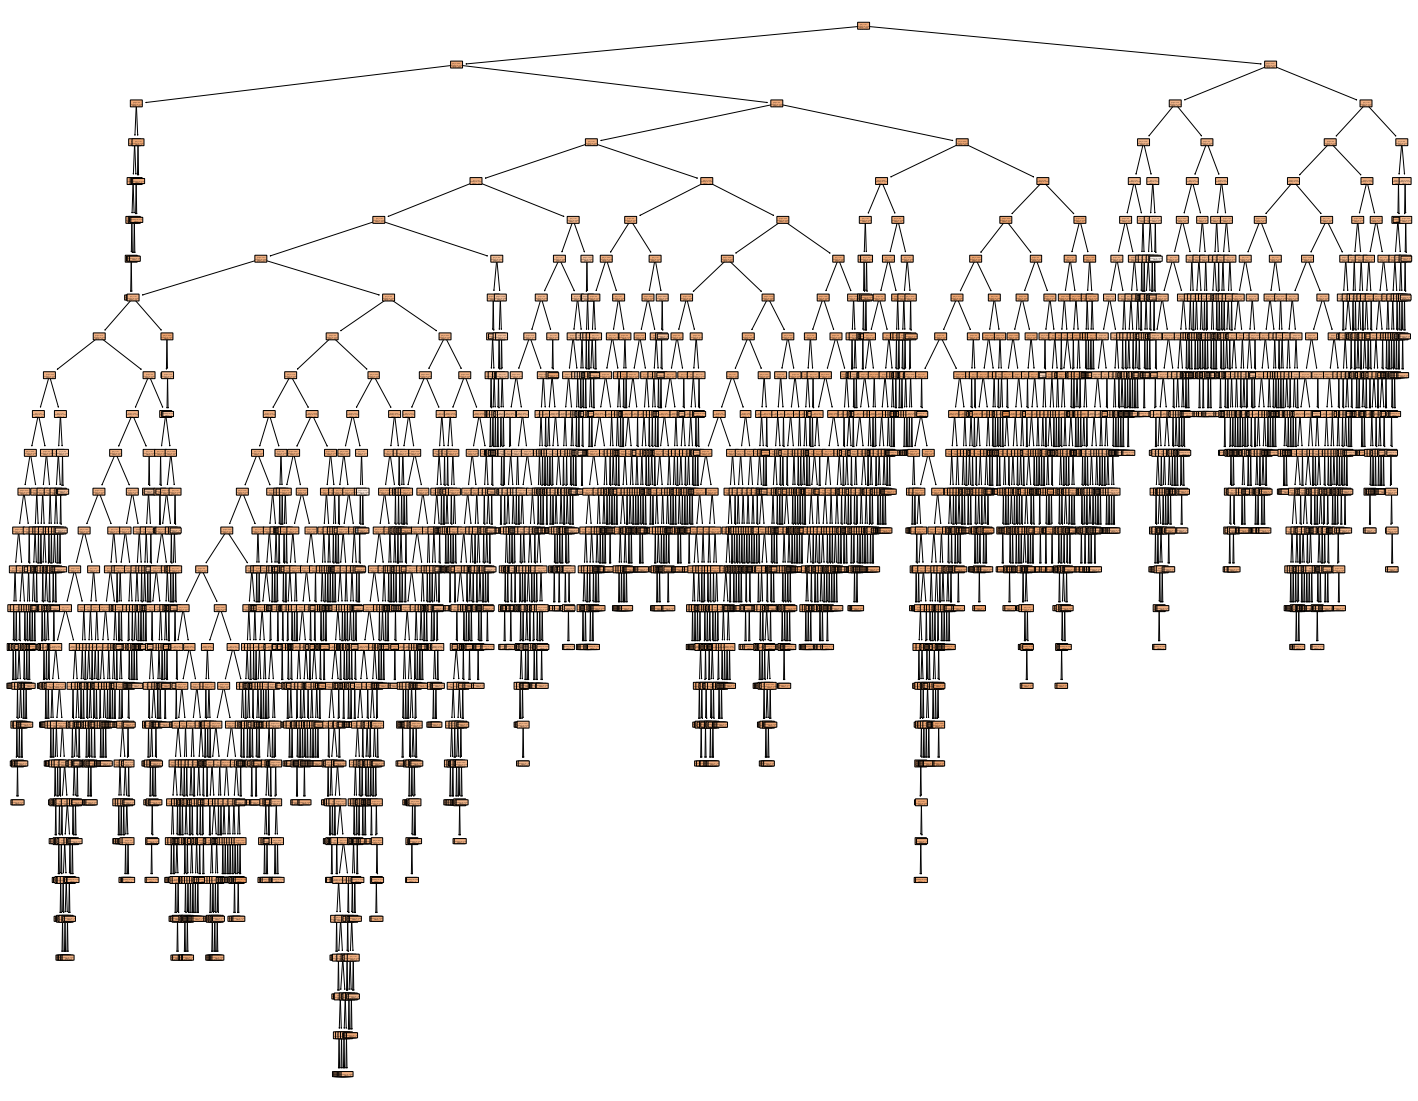

In [64]:
# tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree( trees_fit , filled = True , rounded = True  )

In [77]:
y_hat_t = trees_fit.predict(model_X_basic_test)

MSE_t= sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - y_hat_t.reshape(-1,1))**2 ) , np.ones( y_hat_t.shape )  ).fit().summary2().tables[1].round(3)
R2_t = 1- MSE_t.iloc[0,0] / np.var( Y_test )

print( f"R^2 using prune tree: {R2_t}")

R^2 using prune tree: 0.0274871430263125


### Pruned tree regressions

In [65]:
trees = DecisionTreeRegressor( random_state = 0, min_impurity_decrease = 0.001 )

In [66]:
path = trees.cost_complexity_pruning_path( model_X_basic_train, y_basic_train )

alphas, impurities = path.ccp_alphas, path.impurities

In [67]:
alphas

array([0.        , 0.00116543, 0.00132255, 0.00777291, 0.00780293,
       0.02038302])

In [68]:
mean1, std1 = [], []

for i in alphas:
     tree_initial = DecisionTreeRegressor(ccp_alpha=i, random_state=0)
# 10 fold cross validation for each alpha value
     scores = cross_val_score(tree_initial, model_X_basic_train, y_basic_train, scoring='neg_mean_squared_error', cv=10)
     mean1.append(scores.mean()), std1.append(scores.std())
            
# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies

table = pd.DataFrame({"alpha": alphas, "mean": mean1, "std": std1})
table["mean"] = (-1)*table["mean"]
table = table.sort_values(["mean"], ascending = True)
table.head(10)


,alpha,mean,std
1,0.001165,0.396996,0.032460
2,0.001323,0.398258,0.032589
3,0.007773,0.409189,0.035123
4,0.007803,0.410785,0.034097
5,0.020383,0.433884,0.036130
0,0.000000,0.445592,0.042018


In [69]:
prune_tree =  DecisionTreeRegressor(ccp_alpha=table.iloc[1,0], random_state=0)

prune_tree_fit = prune_tree.fit(model_X_basic_train, y_basic_train)

In [70]:
prune_tree_fit.get_depth()  # depth's tree

5

In [71]:
prune_tree_fit.get_n_leaves() # number leaves tree

6

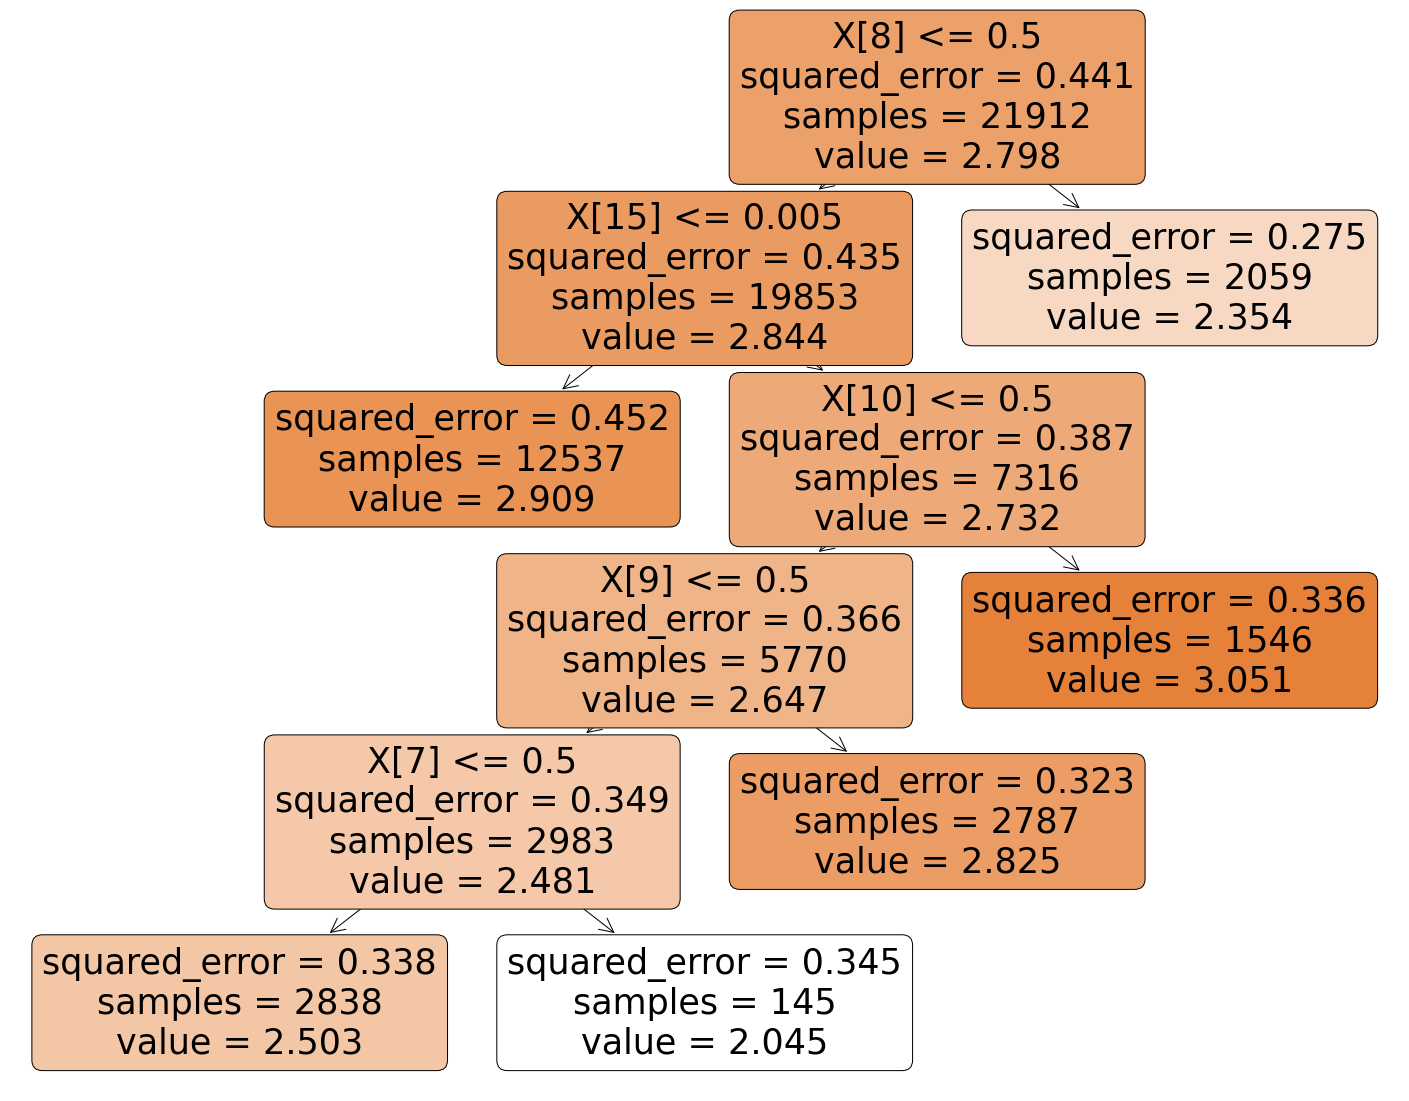

In [72]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree( prune_tree_fit , filled = True , rounded = True  )

In [76]:
y_hat_pt = prune_tree_fit.predict(model_X_basic_test)

MSE_pt= sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - y_hat_pt.reshape(-1,1))**2 ) , np.ones( y_hat_pt.shape )  ).fit().summary2().tables[1].round(3)
R2_pt = 1- MSE_pt.iloc[0,0] / np.var( Y_test )

print( f"R^2 using prune tree: {R2_pt}")

R^2 using prune tree: 0.11757740768658276


### Table of results

In [79]:
table= np.zeros( (12, 3) )
table[0,0:2]   = MSE_lm_basic
table[1,0:2]   = MSE_lm_flex
table[2,0:2]   = MSE_lasso.iloc[0, [0, 1]]
#table[3,0:2]   = MSE_lasso_post.iloc[0, [0, 1]]
table[3,0:2]   = MSE_lasso_flex.iloc[0, [0, 1]]
#table[5,0:2]   = MSE_lasso_post_flex.iloc[0, [0, 1]]
table[4,0:2]   = MSE_lasso_cv_basic.iloc[0, [0, 1]]
table[5,0:2]   = MSE_ridge_basic.iloc[0, [0, 1]]
table[6,0:2]   = MSE_elnet_basic.iloc[0, [0, 1]]
table[7,0:2]   = MSE_lasso_cv_flex.iloc[0, [0, 1]]
table[8,0:2]  = MSE_ridge_flex.iloc[0, [0, 1]]
table[9,0:2]  = MSE_elnet_flex.iloc[0, [0, 1]]
#table[12,0:2]  = MSE_rf.iloc[0, [0, 1]]
#table[13,0:2]  = MSE_boost.iloc[0, [0, 1]]
table[10,0:2]  = MSE_t.iloc[0, [0, 1]]
table[11,0:2]  = MSE_pt.iloc[0, [0, 1]]



table[0,2]   = R2_lm_basic
table[1,2]   = R2_lm_flex
table[2,2]   = R2_lasso
#table[3,2]   = R2_lasso_post
table[3,2]   = R2_lasso_flex
#table[5,2]   = R2_lasso_post_flex
table[3,2]   = R2_lasso_cv_basic
table[5,2]   = R2_ridge_basic
table[6,2]   = R2_elnet_basic
table[7,2]   = R2_lasso_cv_flex
table[8,2]  = R2_ridge_flex
table[9,2]  = R2_elnet_flex
table[10,2]  = R2_t
table[11,2]  = R2_pt




colnames_table= ["MSE", "S_E_ for MSE", "R-squared"]
rownames_table= ["Least Squares (basic)","Least Squares (flexible)", "Lasso","Lasso (flexible)", \
                    "Cross-Validated lasso", "Cross-Validated ridge","Cross-Validated elnet","Cross-Validated lasso (flexible)","Cross-Validated ridge (flexible)","Cross-Validated elnet (flexible)",  \
                    "Regression Tree", "Pruned Tree"]
table_pandas = pd.DataFrame( table, columns = colnames_table )
table_pandas.index = rownames_table

table_pandas = table_pandas.round(3)
table_html = table_pandas.to_latex()
table_pandas

,MSE,S_E_ for MSE,R-squared
Least Squares (basic),0.376,0.012,0.131
Least Squares (flexible),0.320,0.012,0.262
Lasso,0.380,0.012,0.122
Lasso (flexible),0.321,0.012,0.002
Cross-Validated lasso,0.377,0.012,0.000
Cross-Validated ridge,0.432,0.013,0.129
Cross-Validated elnet,0.378,0.012,0.127
Cross-Validated lasso (flexible),0.319,0.012,0.004
Cross-Validated ridge (flexible),0.431,0.013,0.263
Cross-Validated elnet (flexible),0.319,0.012,0.263


## III. Tree regression

In some cases, it will impossible to use a linear regression to predict well. So, tree regression would be a good option. In this case, it is neccesary to  divide the predictor space, which is the set of values of $X1, X2,..., Xp$ in non-overlapping regions $R1, R2, ..., RJ$, where we can analyze which variables are more related to the output for each one. Apart from that, we divide the sample in two groups: training and test. To construct the tree, we use the training data and the goal is to minimize the RSS given by:

\begin{equation}
\sum_{j=1}^{J}\sum_{i\in R_j}(y_i - \hat{y}R_j)^2 
\end{equation}

The prediction is simply the mean of the values for training observations in region $Rj$.

### To build a tree regression using a single predictor you need to follow the next steps:
1. Step 1
- Given a training data, we want to build a regression tree that uses the variable $X$ to predict the variable $Y$. Let's say that X is drug dose and Y is drug effectiveness.
2. Step 2
- Just like a clasification trees, the first thing we do for a regression tree is decide what goes in the root.
3. Step 3
- To make the decision, we calculate the average of the first 2 doses, wich is 3. Then, we buld a very simple tree that splits the measurements in two groups based on whether or not the dose < 3. 
4. Step 4
- Because only one point has a dose < 3, and its average effectiveness is 0, we put 0 and in the corresponding leaf.
- All other points have dose >= 3, and their effectiveness is 38.8, so we put 38.8 in the other leaf.
5. Step 5
- Assuming the following: for the one point with dose < 3, the regression tree makes a good prediction.
6. Setp 6
- Assuming the following: for the one point with dose >= 3, the regression tree makes a bad prediction.
7. Setp 7
- We can visualiaze how good or bad the regression trees is at making predictions by drawning the residuals, the differences between the observed and predicted values.
- We can also quantify how good or bad the predictions are by calculating the Sum of the Squared Residuals (SSR).
- Lastly, we can compare the SSR for different thresholds by plotting them on this graph, wich has dose on the x-axis and SSR on the y-axis.
8. Step 8
- Looking at the SSRs for each dose thershold, the root will be the thershold that had the smaller SSR.
9. Step 9
- If It's necessary, we will repeat step 7 and 8 to split the tree and add more nodes to it.
10. Setp 10 

### To build a regression tree with multiple features
1. Step 1
- For each predictor we select the thershold that give us the smallest SSR. However, instead of that threshold instantly becoming the root, it only becomes a candidate for the root.

2. Step 2
- The root will be the candidate with the  lowest SSR.

3. Step 3
- If It's necessary, you repeat the same process for each node.

### How to prune a tree


We prune a tree to penalize the inclusion of leaves. This is to avoid overfitting with the training observations. So, cutting down the branches, we can improve the predictive perfomance.

\begin{equation}
\sum_{m=1}^{|T|}\sum_{i: x_i\in R_m}(y_i - \hat{y}_{R_m})^2 +\alpha|T|   T \subset T_o
\end{equation}

Where: T indicates the number of leaves of the tree T, R_m is the region corresponding to the mth terminal node and $\hat{y}_{R_j}$ is the same as before. $\alpha$ is the value of penalization